In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [185]:
cred_1 = pd.read_csv('Credit CSVs/EuroHYOAS.csv')
cred_2 = pd.read_csv('Credit CSVs/EuroIGOAS.csv')
cred_3 = pd.read_csv('Credit CSVs/USHYOAS.csv')
cred_4 = pd.read_csv('Credit CSVs/USIGOAS.csv')

fund_1 = pd.read_csv('Funding CSVs/EURIBORESTR.csv')
fund_2 = pd.read_csv('Funding CSVs/JPYLOIS3M.csv')
fund_3 = pd.read_csv('Funding CSVs/TEDSPREAD3M.csv')
fund_4 = pd.read_csv('Funding CSVs/USDLOIS3M.csv')

safe_1 = pd.read_csv('Safe Assets CSVs/German10YBond.csv')
safe_2 = pd.read_csv('Safe Assets CSVs/GoldUSDSpotXRate.csv')
safe_3 = pd.read_csv('Safe Assets CSVs/UST10YBondYeild.csv')

vol_1 = pd.read_csv('Volatility CSVs/DJEuroStoxx50VolIndex.csv')
vol_2 = pd.read_csv('Volatility CSVs/IV6mEurUsdOptions.csv')
vol_6 = pd.read_csv('Volatility CSVs/VIX.csv')

In [186]:
safety = pd.read_csv('Safe Assets CSVs/safe_assets.csv')

In [187]:
stox = pd.read_csv('stox_zscore_buckets.csv')

In [188]:
cred = cred_1.merge(cred_2, on = "Date", how = "inner").merge(cred_3, on = "Date", how = "inner").merge(cred_4, on = "Date", how = "inner")

In [189]:
fund = fund_2.merge(fund_3, on = "Date", how = "inner").merge(fund_4, on = "Date", how = "inner")
safe = safe_1.merge(safe_2, on = "Date", how = "inner").merge(safe_3, on = "Date", how = "inner")
vol = vol_1.merge(vol_2, on = "Date", how = "inner").merge(vol_6, on = "Date", how = "inner")

In [190]:
stox = stox.sort_values('Date')
fund = fund.sort_values('Date')
cred = cred.sort_values('Date')
vol = vol.sort_values('Date')
safe = safe.sort_values('Date')

In [191]:
data = stox.merge(fund, on = "Date", how = "inner").merge(cred, on = "Date", how = "inner").merge(vol, on = "Date", how = "inner").merge(safety, on = "Date", how = "inner")

In [192]:
data = data.drop(columns=['SMAVG (50)_x', 'SMAVG (100)_x','SMAVG (250)_x','SMAVG (50)_y','SMAVG (100)_y', 'SMAVG (250)_y','SMAVG (50)','SMAVG (100)', 'SMAVG (250)']).dropna()

In [202]:
def training_set(date, data, span):
    if date in data['Date'].values:
        end_index = data['Date'].to_list().index(date)
        start_index = end_index - span
        
        dates = []
        
        if start_index >= 0:
            for i in list(range(start_index, end_index)):
                dates.append(data['Date'].to_list()[i])
            train = data.loc[data['Date'].isin(dates)]
        else:
            for i in list(range(0, end_index+1)):
                dates.append(data['Date'].to_list()[i])
            train = data.loc[data['Date'].isin(dates)]
        
        return train
    else:
        print('tried to get training set for date that is not in dataset')

In [195]:
def accuracy(true, predicted):
    predicted_floats = [float(t) for t in predicted]
    return np.sum(true==predicted_floats)/len(predicted)

In [197]:
stox_str = data[['Date', 'zscore_1_1', 'zscore_2_1', 'zscore_3_1',
       'zscore_1_2', 'zscore_2_2', 'zscore_3_2', 'zscore_1_3', 'zscore_2_3',
       'zscore_3_3', 'zscore_1_4', 'zscore_2_4', 'zscore_3_4']]

stox_str[['zscore_1_1', 'zscore_2_1', 'zscore_3_1','zscore_1_2', 
          'zscore_2_2', 'zscore_3_2', 'zscore_1_3', 'zscore_2_3',
          'zscore_3_3', 'zscore_1_4', 'zscore_2_4', 'zscore_3_4']] = stox_str[['zscore_1_1', 'zscore_2_1', 'zscore_3_1','zscore_1_2', 
          'zscore_2_2', 'zscore_3_2', 'zscore_1_3', 'zscore_2_3',
          'zscore_3_3', 'zscore_1_4', 'zscore_2_4', 'zscore_3_4']].astype('string')

<ipython-input-197-22f91585b3db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stox_str[['zscore_1_1', 'zscore_2_1', 'zscore_3_1','zscore_1_2',


In [264]:
n = 15
span = 100

knn_fund_1 = KNeighborsClassifier(n)
knn_fund_2 = KNeighborsClassifier(n)
knn_fund_3 = KNeighborsClassifier(n)

fund_acc_1 = []
fund_dates_1 = []

fund_acc_2 = []
fund_dates_2 = []

fund_acc_3 = []
fund_dates_3 = []

for date in data['Date']:
    X_train = training_set(date, data[['Date','JPY 3MLIBOR-OIS','3M TED Spread','USD 3M Libor - OIS']], span)
    y_train = stox_str.loc[stox_str['Date'].isin(X_train['Date'])]
    
    knn_fund_1.fit(X_train[['JPY 3MLIBOR-OIS','3M TED Spread','USD 3M Libor - OIS']], y_train['zscore_1_1'])
    knn_fund_2.fit(X_train[['JPY 3MLIBOR-OIS','3M TED Spread','USD 3M Libor - OIS']], y_train['zscore_2_1'])
    knn_fund_3.fit(X_train[['JPY 3MLIBOR-OIS','3M TED Spread','USD 3M Libor - OIS']], y_train['zscore_3_1'])
    
    try:
        X_test = data.loc[data['Date'] == date][['JPY 3MLIBOR-OIS','3M TED Spread','USD 3M Libor - OIS']]
        probas = knn_fund_1.predict_proba(X_test)
        classes = knn_fund_1.classes_
        prob = probas[0][classes.tolist().index(str(data.loc[data['Date']==date]['zscore_1_1'].values[0]))]
        
        fund_acc_1.append(prob)
        fund_dates_1.append(date)
        
    except:
         print('error for zscore 1 accuracies')
         fund_acc_1.append('nan')
         fund_dates_1.append(date)
    
    
    try:
        X_test = data.loc[data['Date'] == date][['JPY 3MLIBOR-OIS','3M TED Spread','USD 3M Libor - OIS']]
        probas = knn_fund_2.predict_proba(X_test)
        classes = knn_fund_2.classes_
        prob = probas[0][classes.tolist().index(str(data.loc[data['Date']==date]['zscore_2_1'].values[0]))]
        
        fund_acc_2.append(prob)
        fund_dates_2.append(date)
    except:
        print('error for zscore 2 accuracies')
        fund_acc_2.append('nan')
        fund_dates_2.append(date)
        
    try:
        X_test = data.loc[data['Date'] == date][['JPY 3MLIBOR-OIS','3M TED Spread','USD 3M Libor - OIS']]
        probas = knn_fund_3.predict_proba(X_test)
        classes = knn_fund_3.classes_
        prob = probas[0][classes.tolist().index(str(data.loc[data['Date']==date]['zscore_3_1'].values[0]))]
        
        fund_acc_3.append(prob)
        fund_dates_3.append(date)
    except:
        print('error for zscore 3 accuracies')
        fund_acc_3.append('nan')
        fund_dates_3.append(date)

error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for 

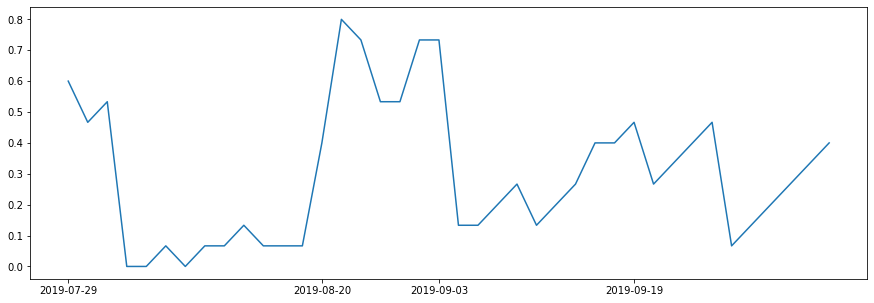

In [278]:
# repo madness?
fund_dates_1.index('2019-09-19')
plt.figure(figsize=(15,5))
plt.plot(fund_dates_1[1610:1650], fund_acc_1[1610:1650])
plt.xticks([0,13,19,29])
plt.show()

In [280]:
data.keys()

Index(['Unnamed: 0', 'Date', 'zscore_1_1', 'zscore_2_1', 'zscore_3_1',
       'zscore_1_2', 'zscore_2_2', 'zscore_3_2', 'zscore_1_3', 'zscore_2_3',
       'zscore_3_3', 'zscore_1_4', 'zscore_2_4', 'zscore_3_4', 'JPY 3M Libor',
       'JPY Overnight Index Swap', 'JPY 3MLIBOR-OIS', 'US 3M Libor_x',
       '3M TBill Mid YTM', '3M TED Spread', 'US 3M Libor_y', 'USD OIS',
       'USD 3M Libor - OIS', 'EU HY OAS', 'EU IG OAS', 'USD HY OAS',
       'USD IG OAS', 'EURO STOXX Vol Closing',
       'IV on 6m EUR/USD Options Mid Price', 'VIX Closing', '10YUST', '10YGER',
       'GLD', 'USDJPY', 'USDCHF', 'DXY'],
      dtype='object')

In [281]:
n = 15
span = 100

knn_cred_1 = KNeighborsClassifier(n)
knn_cred_2 = KNeighborsClassifier(n)
knn_cred_3 = KNeighborsClassifier(n)

cred_acc_1 = []
cred_dates_1 = []

cred_acc_2 = []
cred_dates_2 = []

cred_acc_3 = []
cred_dates_3 = []

for date in data['Date']:
    X_train = training_set(date, data[['Date','EU HY OAS', 'EU IG OAS', 'USD HY OAS','USD IG OAS']], span)
    y_train = stox_str.loc[stox_str['Date'].isin(X_train['Date'])]
    
    knn_cred_1.fit(X_train[['EU HY OAS', 'EU IG OAS', 'USD HY OAS','USD IG OAS']], y_train['zscore_1_1'])
    knn_cred_2.fit(X_train[['EU HY OAS', 'EU IG OAS', 'USD HY OAS','USD IG OAS']], y_train['zscore_2_1'])
    knn_cred_3.fit(X_train[['EU HY OAS', 'EU IG OAS', 'USD HY OAS','USD IG OAS']], y_train['zscore_3_1'])
    
    try:
        X_test = data.loc[data['Date'] == date][['EU HY OAS', 'EU IG OAS', 'USD HY OAS','USD IG OAS']]
        probas = knn_cred_1.predict_proba(X_test)
        classes = knn_cred_1.classes_
        prob = probas[0][classes.tolist().index(str(data.loc[data['Date']==date]['zscore_1_1'].values[0]))]
        
        cred_acc_1.append(prob)
        cred_dates_1.append(date)
        
    except:
         print('error for zscore 1 accuracies')
         cred_acc_1.append('nan')
         cred_dates_1.append(date)
    
    
    try:
        X_test = data.loc[data['Date'] == date][['EU HY OAS', 'EU IG OAS', 'USD HY OAS','USD IG OAS']]
        probas = knn_cred_2.predict_proba(X_test)
        classes = knn_cred_2.classes_
        prob = probas[0][classes.tolist().index(str(data.loc[data['Date']==date]['zscore_2_1'].values[0]))]
        
        cred_acc_2.append(prob)
        cred_dates_2.append(date)
    except:
        print('error for zscore 2 accuracies')
        cred_acc_2.append('nan')
        cred_dates_2.append(date)
        
    try:
        X_test = data.loc[data['Date'] == date][['EU HY OAS', 'EU IG OAS', 'USD HY OAS','USD IG OAS']]
        probas = knn_cred_3.predict_proba(X_test)
        classes = knn_cred_3.classes_
        prob = probas[0][classes.tolist().index(str(data.loc[data['Date']==date]['zscore_3_1'].values[0]))]
        
        cred_acc_3.append(prob)
        cred_dates_3.append(date)
    except:
        print('error for zscore 3 accuracies')
        cred_acc_3.append('nan')
        cred_dates_3.append(date)

error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for 

In [285]:
n = 15
span = 100

knn_safe_1 = KNeighborsClassifier(n)
knn_safe_2 = KNeighborsClassifier(n)
knn_safe_3 = KNeighborsClassifier(n)

safe_acc_1 = []
safe_dates_1 = []

safe_acc_2 = []
safe_dates_2 = []

safe_acc_3 = []
safe_dates_3 = []

for date in data['Date']:
    X_train = training_set(date, data[['Date','10YUST', '10YGER','GLD', 'USDJPY', 'USDCHF', 'DXY']], span)
    y_train = stox_str.loc[stox_str['Date'].isin(X_train['Date'])]
    
    knn_safe_1.fit(X_train[['10YUST', '10YGER','GLD', 'USDJPY', 'USDCHF', 'DXY']], y_train['zscore_1_1'])
    knn_safe_2.fit(X_train[['10YUST', '10YGER','GLD', 'USDJPY', 'USDCHF', 'DXY']], y_train['zscore_2_1'])
    knn_safe_3.fit(X_train[['10YUST', '10YGER','GLD', 'USDJPY', 'USDCHF', 'DXY']], y_train['zscore_3_1'])
    
    try:
        X_test = data.loc[data['Date'] == date][['10YUST', '10YGER','GLD', 'USDJPY', 'USDCHF', 'DXY']]
        probas = knn_safe_1.predict_proba(X_test)
        classes = knn_safe_1.classes_
        prob = probas[0][classes.tolist().index(str(data.loc[data['Date']==date]['zscore_1_1'].values[0]))]
        
        safe_acc_1.append(prob)
        safe_dates_1.append(date)
        
    except:
         print('error for zscore 1 accuracies')
         safe_acc_1.append('nan')
         safe_dates_1.append(date)
    
    
    try:
        X_test = data.loc[data['Date'] == date][['10YUST', '10YGER','GLD', 'USDJPY', 'USDCHF', 'DXY']]
        probas = knn_safe_2.predict_proba(X_test)
        classes = knn_safe_2.classes_
        prob = probas[0][classes.tolist().index(str(data.loc[data['Date']==date]['zscore_2_1'].values[0]))]
        
        safe_acc_2.append(prob)
        safe_dates_2.append(date)
    except:
        print('error for zscore 2 accuracies')
        safe_acc_2.append('nan')
        safe_dates_2.append(date)
        
    try:
        X_test = data.loc[data['Date'] == date][['10YUST', '10YGER','GLD', 'USDJPY', 'USDCHF', 'DXY']]
        probas = knn_safe_3.predict_proba(X_test)
        classes = knn_safe_3.classes_
        prob = probas[0][classes.tolist().index(str(data.loc[data['Date']==date]['zscore_3_1'].values[0]))]
        
        safe_acc_3.append(prob)
        safe_dates_3.append(date)
    except:
        print('error for zscore 3 accuracies')
        safe_acc_3.append('nan')
        safe_dates_3.append(date)

error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for 

In [286]:
n = 15
span = 100

knn_vol_1 = KNeighborsClassifier(n)
knn_vol_2 = KNeighborsClassifier(n)
knn_vol_3 = KNeighborsClassifier(n)

vol_acc_1 = []
vol_dates_1 = []

vol_acc_2 = []
vol_dates_2 = []

vol_acc_3 = []
vol_dates_3 = []

for date in data['Date']:
    X_train = training_set(date, data[['Date','EURO STOXX Vol Closing','IV on 6m EUR/USD Options Mid Price', 'VIX Closing']], span)
    y_train = stox_str.loc[stox_str['Date'].isin(X_train['Date'])]
    
    knn_vol_1.fit(X_train[['EURO STOXX Vol Closing','IV on 6m EUR/USD Options Mid Price', 'VIX Closing']], y_train['zscore_1_1'])
    knn_vol_2.fit(X_train[['EURO STOXX Vol Closing','IV on 6m EUR/USD Options Mid Price', 'VIX Closing']], y_train['zscore_2_1'])
    knn_vol_3.fit(X_train[['EURO STOXX Vol Closing','IV on 6m EUR/USD Options Mid Price', 'VIX Closing']], y_train['zscore_3_1'])
    
    try:
        X_test = data.loc[data['Date'] == date][['EURO STOXX Vol Closing','IV on 6m EUR/USD Options Mid Price', 'VIX Closing']]
        probas = knn_vol_1.predict_proba(X_test)
        classes = knn_vol_1.classes_
        prob = probas[0][classes.tolist().index(str(data.loc[data['Date']==date]['zscore_1_1'].values[0]))]
        
        vol_acc_1.append(prob)
        vol_dates_1.append(date)
        
    except:
         print('error for zscore 1 accuracies')
         vol_acc_1.append('nan')
         vol_dates_1.append(date)
    
    
    try:
        X_test = data.loc[data['Date'] == date][['EURO STOXX Vol Closing','IV on 6m EUR/USD Options Mid Price', 'VIX Closing']]
        probas = knn_vol_2.predict_proba(X_test)
        classes = knn_vol_2.classes_
        prob = probas[0][classes.tolist().index(str(data.loc[data['Date']==date]['zscore_2_1'].values[0]))]
        
        vol_acc_2.append(prob)
        vol_dates_2.append(date)
    except:
        print('error for zscore 2 accuracies')
        vol_acc_2.append('nan')
        vol_dates_2.append(date)
        
    try:
        X_test = data.loc[data['Date'] == date][['EURO STOXX Vol Closing','IV on 6m EUR/USD Options Mid Price', 'VIX Closing']]
        probas = knn_vol_3.predict_proba(X_test)
        classes = knn_vol_3.classes_
        prob = probas[0][classes.tolist().index(str(data.loc[data['Date']==date]['zscore_3_1'].values[0]))]
        
        vol_acc_3.append(prob)
        vol_dates_3.append(date)
    except:
        print('error for zscore 3 accuracies')
        vol_acc_3.append('nan')
        vol_dates_3.append(date)

error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for zscore 1 accuracies
error for zscore 2 accuracies
error for zscore 3 accuracies
error for 